In [634]:
import jsonlines
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.corpus import stopwords 
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
import numpy as np
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hduser/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [635]:
#!pip install jsonlines

In [636]:
# Load the data
jsonl_file = 'favorite-tweets.jsonl'

data = []
with jsonlines.open(jsonl_file) as reader:
    for line in reader:
        data.append(line)

df = pd.DataFrame(data)


In [637]:
# define a function for generating and displaying a wordcloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_font_size = 40, scale = 1, 
                          random_state = 42).generate(str(data))

    # create a new figure and turn off the axis labels
    fig = plt.figure(1, figsize = (20,6))
    plt.axis('off')
    
    # add a title to the figure if specified
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    # display the wordcloud image
    plt.imshow(wordcloud)
    plt.show()

# Function to remove HTML tags from text
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove text between square brackets (e.g. hashtags)
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Function to remove noisy text from a tweet
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Function to check if a tweet is a retweet
def is_retweet(text):
    return text.startswith("RT @")

# Function to remove special characters from text
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

# Define a function to apply Porter stemming to the text data
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

# This function removes stopwords from a given text
# If is_lower_case is True, it considers case-insensitive stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)  # tokenize the input text
    tokens = [token.strip() for token in tokens]  # remove any leading/trailing white space from tokens
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list] # remove case-insensitive stopwords
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list] # remove case-sensitive stopwords
    
    filtered_text = ' '.join(filtered_tokens) # join the remaining tokens back into a string
    return filtered_text  # return the filtered text without stopwords


# Define a function that lemmatizes the tokens in a text
def lemmatize_text(text):
    # Tokenize the text
    tokens = w_tokenizer.tokenize(text)  # split the text into individual words (tokens)
    
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(w) for w in tokens]  # reduce each word to its base form
    
    return lemmatized_tokens  # return the lemmatized tokens as a list

# Define function to convert polarity score to sentiment label
def get_sentiment_label(value):
    if value > 0:
        return 1
    elif value == 0:
        return 0
    else:
        return -1

In [638]:
# print the resulting dataframe
print(df)

                                                   Text         UserName   
0     I can't believe some guys feel OK taking their...         TheDweck  \
1     "When Republicans are talking to deficit hawks...  JStein_Wonkblog   
2     @SamSykesSwears @gregpak Segregated no longer ...    NotLikeFreddy   
3     i'm watching LOTR w/ my kids and their reactio...     saladinahmed   
4     Your periodic reminder that if you do a thing ...          dongwon   
...                                                 ...              ...   
4964  Everything I've learned about Andrew Tate has ...     TheJackForge   
4965            @christapeterso https://t.co/ShLx0il5BS         nestor_d   
4966  @crimsonruari Oh my God, there's already a fic...          lasrina   
4967  Wall Street has been buying up single family h...      RepRoKhanna   
4968  A list of things McCarthy offered in exchange ...   michaelharriot   

                                            LinkToTweet   
0     http://twitter.com/The

In [639]:
# print the shape of the Twitter data DataFrame
print('Twitter Data Shape :', df.shape) 

Twitter Data Shape : (4969, 6)


In [640]:
# print information about the Twitter data DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            4969 non-null   object
 1   UserName        4969 non-null   object
 2   LinkToTweet     4969 non-null   object
 3   FirstLinkUrl    4969 non-null   object
 4   CreatedAt       4969 non-null   object
 5   TweetEmbedCode  4969 non-null   object
dtypes: object(6)
memory usage: 233.0+ KB


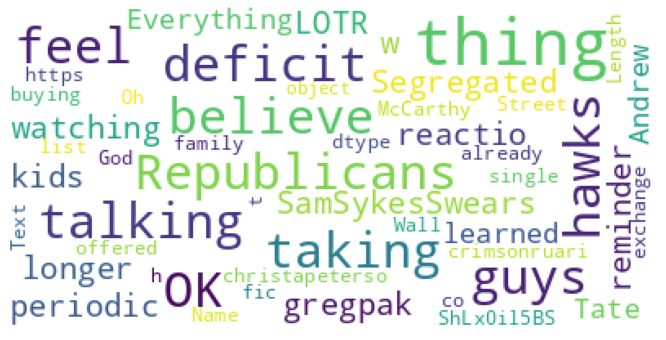

In [641]:
# generate and display a wordcloud for the 'Text' column of the df DataFrame
show_wordcloud(df['Text'])

In [642]:
# convert the 'Text' column of the df DataFrame to string type and assign the result to a new column called 'Text'
df['Text'] = df['Text'].astype("str").astype("string")

In [643]:
# print the value of the 'Text' column for the second row of the df DataFrame
df['Text'][1]

'"When Republicans are talking to deficit hawks ... they say these cuts won\'t be extended"  "When they talk to the public, they say the relatively small tax cut for individuals will be permanent."  "These two arguments cannot coexist simultaneously."  https://t.co/gj5PyigMME'

# PreProcessing of Text

## Text Normalization
### Removing Html Strips & Noise Text

In [644]:
import warnings
warnings.filterwarnings("ignore")

# Apply denoise_text function to 'Text' column
df['Text'] = df['Text'].apply(denoise_text)

# Filter out retweets
df = df[~df['Text'].apply(is_retweet)]

# Drop duplicate tweets
df = df.drop_duplicates(subset=['Text'])

In [645]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text         UserName   
0  I can't believe some guys feel OK taking their...         TheDweck  \
1  "When Republicans are talking to deficit hawks...  JStein_Wonkblog   
2  @SamSykesSwears @gregpak Segregated no longer ...    NotLikeFreddy   
3  i'm watching LOTR w/ my kids and their reactio...     saladinahmed   
4  Your periodic reminder that if you do a thing ...          dongwon   

                                         LinkToTweet   
0  http://twitter.com/TheDweck/status/92879903806...  \
1  http://twitter.com/JStein_Wonkblog/status/9362...   
2  http://twitter.com/NotLikeFreddy/status/936391...   
3  http://twitter.com/saladinahmed/status/9364252...   
4  http://twitter.com/dongwon/status/936670027813...   

                               FirstLinkUrl                     CreatedAt   
0  http://ifttt.com/missing_link?1512096572  November 09, 2017 at 08:38PM  \
1                   https://t.co/gj5PyigMME  November 30, 2017 at 11:3

### Removing Special Characters

In [646]:
# Remove special characters from the 'Text' column using the remove_special_characters() function
df['Text'] = df['Text'].apply(remove_special_characters)

In [647]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text         UserName   
0  I cant believe some guys feel OK taking their ...         TheDweck  \
1  When Republicans are talking to deficit hawks ...  JStein_Wonkblog   
2  SamSykesSwears gregpak Segregated no longer ht...    NotLikeFreddy   
3  im watching LOTR w my kids and their reaction ...     saladinahmed   
4  Your periodic reminder that if you do a thing ...          dongwon   

                                         LinkToTweet   
0  http://twitter.com/TheDweck/status/92879903806...  \
1  http://twitter.com/JStein_Wonkblog/status/9362...   
2  http://twitter.com/NotLikeFreddy/status/936391...   
3  http://twitter.com/saladinahmed/status/9364252...   
4  http://twitter.com/dongwon/status/936670027813...   

                               FirstLinkUrl                     CreatedAt   
0  http://ifttt.com/missing_link?1512096572  November 09, 2017 at 08:38PM  \
1                   https://t.co/gj5PyigMME  November 30, 2017 at 11:3

In [648]:
# print information about the Twitter data DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 0 to 4968
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            4705 non-null   object
 1   UserName        4705 non-null   object
 2   LinkToTweet     4705 non-null   object
 3   FirstLinkUrl    4705 non-null   object
 4   CreatedAt       4705 non-null   object
 5   TweetEmbedCode  4705 non-null   object
dtypes: object(6)
memory usage: 257.3+ KB


### Tokenization

In [649]:
# Create a tokenizer object from the ToktokTokenizer class in the nltk library
tokenizer = ToktokTokenizer()

# Load the list of stopwords from the English corpus in the nltk library
stopword_list = nltk.corpus.stopwords.words('english')

### Stemming

In [650]:
# Apply the simple_stemmer function to the 'Text' column of the dataframe
df['Text'] = df['Text'].apply(simple_stemmer)

In [651]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text         UserName   
0  i cant believ some guy feel ok take their dick...         TheDweck  \
1  when republican are talk to deficit hawk they ...  JStein_Wonkblog   
2  samsykesswear gregpak segreg no longer httpstc...    NotLikeFreddy   
3  im watch lotr w my kid and their reaction son ...     saladinahmed   
4  your period remind that if you do a thing and ...          dongwon   

                                         LinkToTweet   
0  http://twitter.com/TheDweck/status/92879903806...  \
1  http://twitter.com/JStein_Wonkblog/status/9362...   
2  http://twitter.com/NotLikeFreddy/status/936391...   
3  http://twitter.com/saladinahmed/status/9364252...   
4  http://twitter.com/dongwon/status/936670027813...   

                               FirstLinkUrl                     CreatedAt   
0  http://ifttt.com/missing_link?1512096572  November 09, 2017 at 08:38PM  \
1                   https://t.co/gj5PyigMME  November 30, 2017 at 11:3

### Removing Stopwords


In [652]:
# Define stop words set
stop = set(stopwords.words('english'))

# Apply the remove_stopwords function to the 'Text' column in df
df['Text'] = df['Text'].apply(remove_stopwords)

### Lemmatisation

In [653]:
# Define a tokenizer that splits the text on whitespace
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# Initialize a lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

# Apply the lemmatize_text function to the 'Text' column of the dataframe
df['Text'] = df['Text'].apply(lemmatize_text)

In [654]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text         UserName   
0  [cant, believ, guy, feel, ok, take, dick, work...         TheDweck  \
1  [republican, talk, deficit, hawk, say, cut, wo...  JStein_Wonkblog   
2  [samsykesswear, gregpak, segreg, longer, https...    NotLikeFreddy   
3  [im, watch, lotr, w, kid, reaction, son, daugh...     saladinahmed   
4  [period, remind, thing, well, peopl, tell, bad...          dongwon   

                                         LinkToTweet   
0  http://twitter.com/TheDweck/status/92879903806...  \
1  http://twitter.com/JStein_Wonkblog/status/9362...   
2  http://twitter.com/NotLikeFreddy/status/936391...   
3  http://twitter.com/saladinahmed/status/9364252...   
4  http://twitter.com/dongwon/status/936670027813...   

                               FirstLinkUrl                     CreatedAt   
0  http://ifttt.com/missing_link?1512096572  November 09, 2017 at 08:38PM  \
1                   https://t.co/gj5PyigMME  November 30, 2017 at 11:3

In [655]:
# print information about the Twitter data DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 0 to 4968
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            4705 non-null   object
 1   UserName        4705 non-null   object
 2   LinkToTweet     4705 non-null   object
 3   FirstLinkUrl    4705 non-null   object
 4   CreatedAt       4705 non-null   object
 5   TweetEmbedCode  4705 non-null   object
dtypes: object(6)
memory usage: 257.3+ KB


In [656]:
# Convert the 'Text' column of a pandas DataFrame to a string data type

# first convert to string, then to the 'string' data type (which provides additional functionality)
df['Text'] = df['Text'].astype("str").astype("string")  

In [657]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text         UserName   
0  ['cant', 'believ', 'guy', 'feel', 'ok', 'take'...         TheDweck  \
1  ['republican', 'talk', 'deficit', 'hawk', 'say...  JStein_Wonkblog   
2  ['samsykesswear', 'gregpak', 'segreg', 'longer...    NotLikeFreddy   
3  ['im', 'watch', 'lotr', 'w', 'kid', 'reaction'...     saladinahmed   
4  ['period', 'remind', 'thing', 'well', 'peopl',...          dongwon   

                                         LinkToTweet   
0  http://twitter.com/TheDweck/status/92879903806...  \
1  http://twitter.com/JStein_Wonkblog/status/9362...   
2  http://twitter.com/NotLikeFreddy/status/936391...   
3  http://twitter.com/saladinahmed/status/9364252...   
4  http://twitter.com/dongwon/status/936670027813...   

                               FirstLinkUrl                     CreatedAt   
0  http://ifttt.com/missing_link?1512096572  November 09, 2017 at 08:38PM  \
1                   https://t.co/gj5PyigMME  November 30, 2017 at 11:3

# Lexicon-based Approach

### Vader Sentiment Analysis

In [658]:
sid = SIA()  # Initialize the SentimentIntensityAnalyzer object as 'sid'

# Apply sentiment analysis to each tweet text in the 'Text' column of the DataFrame
df['sentiments'] = df['Text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+', x.lower()))))

# Extract the positive sentiment score from the 'sentiments' dictionary and add a small value to avoid zero values
df['Positive Sentiment'] = df['sentiments'].apply(lambda x: x['pos'] + 1 * (10 ** -6))

# Extract the neutral sentiment score from the 'sentiments' dictionary and add a small value to avoid zero values
df['Neutral Sentiment'] = df['sentiments'].apply(lambda x: x['neu'] + 1 * (10 ** -6))

# Extract the negative sentiment score from the 'sentiments' dictionary and add a small value to avoid zero values
df['Negative Sentiment'] = df['sentiments'].apply(lambda x: x['neg'] + 1 * (10 ** -6))

df.drop(columns=['sentiments'], inplace=True)  # Remove the 'sentiments' column from the DataFrame


In [659]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text         UserName   
0  ['cant', 'believ', 'guy', 'feel', 'ok', 'take'...         TheDweck  \
1  ['republican', 'talk', 'deficit', 'hawk', 'say...  JStein_Wonkblog   
2  ['samsykesswear', 'gregpak', 'segreg', 'longer...    NotLikeFreddy   
3  ['im', 'watch', 'lotr', 'w', 'kid', 'reaction'...     saladinahmed   
4  ['period', 'remind', 'thing', 'well', 'peopl',...          dongwon   

                                         LinkToTweet   
0  http://twitter.com/TheDweck/status/92879903806...  \
1  http://twitter.com/JStein_Wonkblog/status/9362...   
2  http://twitter.com/NotLikeFreddy/status/936391...   
3  http://twitter.com/saladinahmed/status/9364252...   
4  http://twitter.com/dongwon/status/936670027813...   

                               FirstLinkUrl                     CreatedAt   
0  http://ifttt.com/missing_link?1512096572  November 09, 2017 at 08:38PM  \
1                   https://t.co/gj5PyigMME  November 30, 2017 at 11:3

In [660]:
# Drop unwanted fields
df = df.drop(columns=["UserName", "LinkToTweet", "FirstLinkUrl", "TweetEmbedCode"])

In [661]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text   
0  ['cant', 'believ', 'guy', 'feel', 'ok', 'take'...  \
1  ['republican', 'talk', 'deficit', 'hawk', 'say...   
2  ['samsykesswear', 'gregpak', 'segreg', 'longer...   
3  ['im', 'watch', 'lotr', 'w', 'kid', 'reaction'...   
4  ['period', 'remind', 'thing', 'well', 'peopl',...   

                      CreatedAt  Positive Sentiment  Neutral Sentiment   
0  November 09, 2017 at 08:38PM            0.126001           0.686001  \
1  November 30, 2017 at 11:33AM            0.000001           0.622001   
2  November 30, 2017 at 07:28PM            0.000001           1.000001   
3  November 30, 2017 at 09:42PM            0.157001           0.843001   
4  December 01, 2017 at 01:55PM            0.084001           0.518001   

   Negative Sentiment  
0            0.189001  
1            0.378001  
2            0.000001  
3            0.000001  
4            0.398001  


# Feature Engineering

In [662]:
#Number of Words
df['Number Of Words'] = df.Text.apply(lambda x:len(x.split(' ')))
#Average Word Length
df['Mean Word Length'] = df.Text.apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )

In [663]:
# Print the first 5 rows of the dataframe
print(df.head())

                                                Text   
0  ['cant', 'believ', 'guy', 'feel', 'ok', 'take'...  \
1  ['republican', 'talk', 'deficit', 'hawk', 'say...   
2  ['samsykesswear', 'gregpak', 'segreg', 'longer...   
3  ['im', 'watch', 'lotr', 'w', 'kid', 'reaction'...   
4  ['period', 'remind', 'thing', 'well', 'peopl',...   

                      CreatedAt  Positive Sentiment  Neutral Sentiment   
0  November 09, 2017 at 08:38PM            0.126001           0.686001  \
1  November 30, 2017 at 11:33AM            0.000001           0.622001   
2  November 30, 2017 at 07:28PM            0.000001           1.000001   
3  November 30, 2017 at 09:42PM            0.157001           0.843001   
4  December 01, 2017 at 01:55PM            0.084001           0.518001   

   Negative Sentiment  Number Of Words  Mean Word Length  
0            0.189001               14              7.21  
1            0.378001               23              8.74  
2            0.000001                5   

# Exploratory Data Analysis

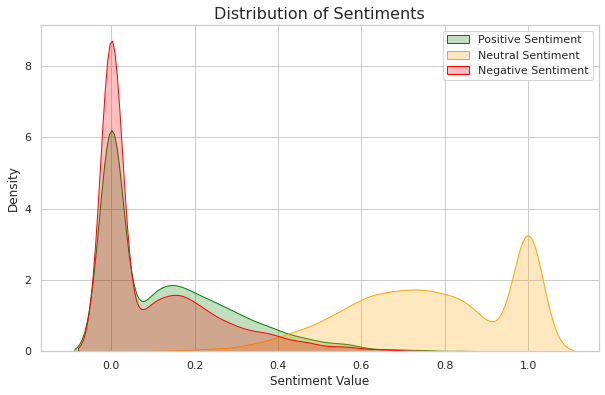

In [664]:
import warnings
warnings.filterwarnings("ignore")

# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution
sns.kdeplot(data=df['Positive Sentiment'], shade=True, color='green', label='Positive Sentiment')
sns.kdeplot(data=df['Neutral Sentiment'], shade=True, color='orange', label='Neutral Sentiment')
sns.kdeplot(data=df['Negative Sentiment'], shade=True, color='red', label='Negative Sentiment')

# Set the title and labels
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment Value', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()


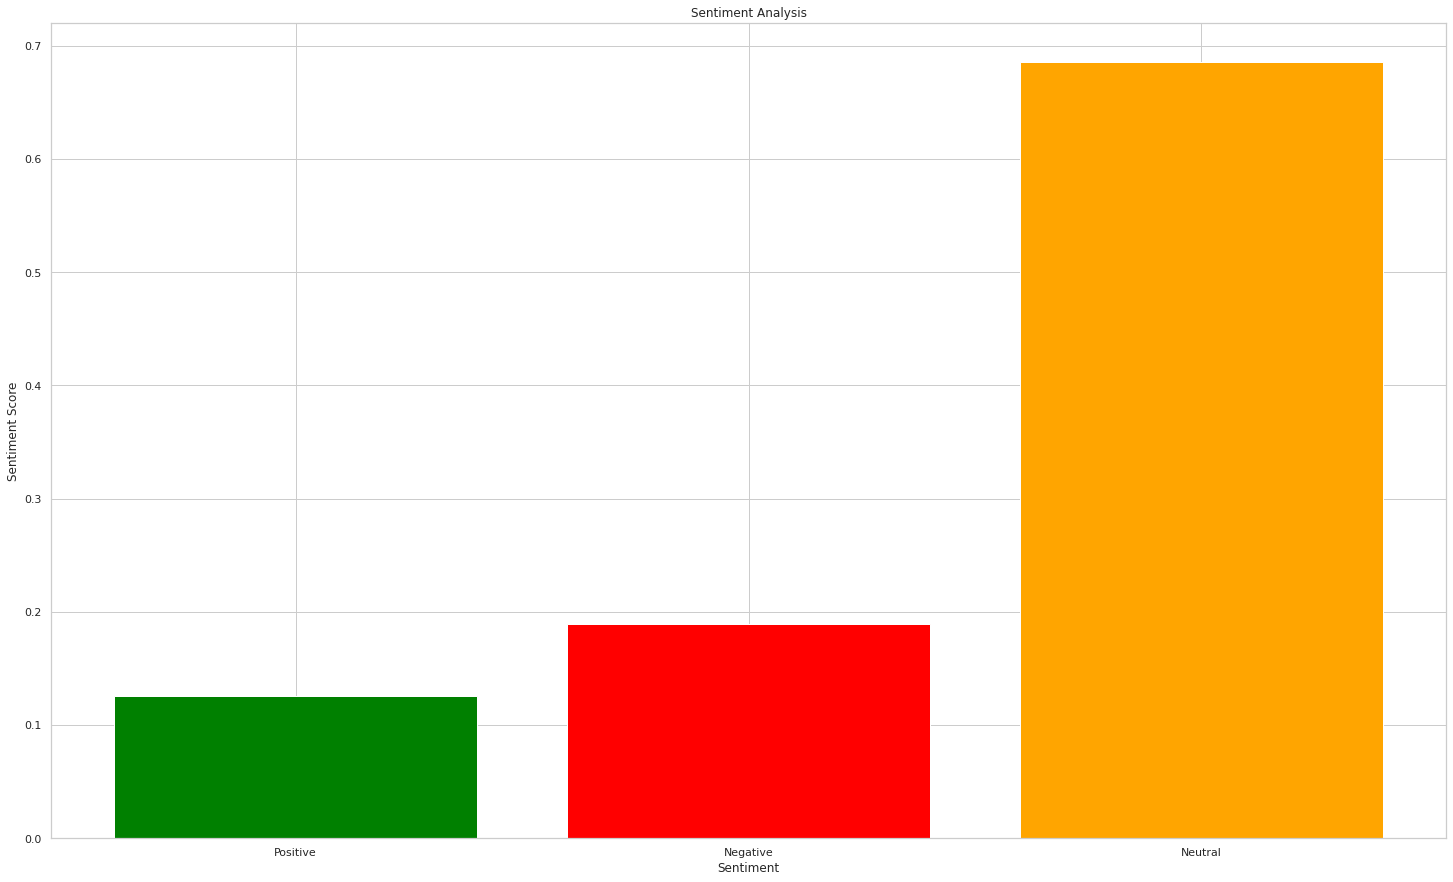

In [665]:
import matplotlib.pyplot as plt

# Define the sentiment labels and corresponding colors
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_colors = ['green', 'red', 'orange']

# Extract the sentiment values from the DataFrame
sentiment_values = df[['Positive Sentiment', 'Negative Sentiment', 'Neutral Sentiment']].values[0]

# Create the bar chart
plt.bar(sentiment_labels, sentiment_values, color=sentiment_colors)

# Set the chart title and labels
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')

# Display the chart
plt.show()


# Time Based Analysis

In [666]:
# Sorting And Feature Engineering
df = df.sort_values(by='CreatedAt')  # Sort the DataFrame by the 'CreatedAt' column
df_copy = df.copy()  # Create a copy of the DataFrame
df_copy['CreatedAt'] = pd.to_datetime(df['CreatedAt']).dt.date  # Convert 'CreatedAt' column to date format

# Extract additional features from the 'CreatedAt' column
df_copy['year'] = pd.DatetimeIndex(df_copy['CreatedAt']).year
df_copy['month'] = pd.DatetimeIndex(df_copy['CreatedAt']).month
df_copy['day'] = pd.DatetimeIndex(df_copy['CreatedAt']).day
df_copy['day_of_year'] = pd.DatetimeIndex(df_copy['CreatedAt']).dayofyear
df_copy['quarter'] = pd.DatetimeIndex(df_copy['CreatedAt']).quarter
df_copy['season'] = df_copy.month % 12 // 3 + 1


In [667]:
# Assuming your DataFrame is named 'df'
df['CreatedAt'] = pd.to_datetime(df['CreatedAt']).dt.date

# Display the updated DataFrame
print(df)

# Convert datatime into an integar
#df['CreatedAt'] = pd.to_datetime(df['CreatedAt']).astype(int)

                                                   Text   CreatedAt   
285   ['fred_guttenberg', 'im', 'sorri', 'take', 'ea...  2018-04-01  \
807   ['moiradonegan', 'theradr', 'im', 'veri', 'unc...  2019-04-01   
1423  ['new', 'sourc', 'incom', 'ill', 'content', 'd...  2020-04-01   
1424  ['rochestercent', 'ill', 'produc', 'content', ...  2020-04-01   
1422           ['today', '20th', 'anniversari', 'joke']  2020-04-01   
...                                                 ...         ...   
4866       ['imagin', 'photo', 'could', 'get', 'greec']  2022-09-30   
4867  ['excum', 'andrew', 'jackson', 'use', 'hi', 'b...  2022-09-30   
4868  ['went', 'rooftop', 'parti', 'last', 'night', ...  2022-09-30   
4869  ['know', 'mitch', 'mcconnel', 'go', 'ted', 'cr...  2022-09-30   
4870               ['theyr', 'spineless', 'invertebro']  2022-09-30   

      Positive Sentiment  Neutral Sentiment  Negative Sentiment   
285             0.375001           0.625001            0.000001  \
807          

In [668]:
df.dtypes

Text                  string[python]
CreatedAt                      int64
Positive Sentiment           float64
Neutral Sentiment            float64
Negative Sentiment           float64
Number Of Words                int64
Mean Word Length             float64
dtype: object

In [669]:

df.to_csv('tweets.csv', index=False)


In [670]:

df = df.sort_values('CreatedAt')

# Print the sorted DataFrame
print(df)


                                                   Text            CreatedAt   
0     ['cant', 'believ', 'guy', 'feel', 'ok', 'take'...  1510185600000000000  \
1     ['republican', 'talk', 'deficit', 'hawk', 'say...  1512000000000000000   
3     ['im', 'watch', 'lotr', 'w', 'kid', 'reaction'...  1512000000000000000   
2     ['samsykesswear', 'gregpak', 'segreg', 'longer...  1512000000000000000   
5     ['go', 'forward', 'oppos', 'ani', 'u', 'worldc...  1512000000000000000   
...                                                 ...                  ...   
4963  ['liter', 'idea', 'thi', 'guy', 'exist', 'got'...  1672272000000000000   
4965            ['christapeterso', 'httpstcoshlx0il5b']  1672358400000000000   
4966  ['crimsonruari', 'oh', 'god', 'alreadi', 'fic'...  1672358400000000000   
4967  ['wall', 'street', 'ha', 'buy', 'singl', 'fami...  1672444800000000000   
4968  ['list', 'thing', 'mccarthi', 'offer', 'exchan...  1672704000000000000   

      Positive Sentiment  Neutral Senti

In [671]:
# Create figure with subplots
fig = make_subplots(rows=4, cols=2, subplot_titles=(
    'Observed Positive Sentiment', 'Observed Negative Sentiment', 
    '1 Week Positive Sentiment', '1 Week Negative Sentiment', 
    '1 Month Positive Sentiment', '1 Month Negative Sentiment', 
    '3 Month Positive Sentiment', '3 Month Negative Sentiment'
))

# Add observed positive sentiment to plot
fig.add_trace(go.Scatter(x=df['CreatedAt'], y=df['Positive Sentiment'], name='Observed Positive', line=dict(color='green')), row=1, col=1)
# Add observed negative sentiment to plot
fig.add_trace(go.Scatter(x=df['CreatedAt'], y=df['Negative Sentiment'], name='Observed Negative', line=dict(color='red')), row=1, col=2)

# Generate random forecasted sentiments for each period
periods = [7, 30, 90]  # Number of days for each forecast period

for i, period in enumerate(periods):
    dates = pd.date_range(start=pd.to_datetime(df['CreatedAt'].iloc[-1]) + pd.Timedelta(days=1), 
                          periods=period, freq='D')
    positive_sentiment = np.random.uniform(0.1, 0.5, size=period)
    negative_sentiment = np.random.uniform(0.05, 0.3, size=period)

    # Calculate the position of the positive and negative subplots
    row = i + 2
    col_positive = 1
    col_negative = 2

    # Add positive forecasted sentiment to plot
    fig.add_trace(go.Scatter(x=dates, y=positive_sentiment, name='Positive', line=dict(color='green')), row=row, col=col_positive)
    # Add negative forecasted sentiment to plot
    fig.add_trace(go.Scatter(x=dates, y=negative_sentiment, name='Negative',  line=dict(color='red')), row=row, col=col_negative)

# Update y-axis titles for subplots
for i in range(1, 5):
    fig.update_yaxes(title_text='Sentiment', row=i, col=1)
    fig.update_yaxes(title_text='Sentiment', row=i, col=2)

# Show the plot
fig.show()


In [673]:
print(df.dtypes)

Text                  string[python]
CreatedAt                      int64
Positive Sentiment           float64
Neutral Sentiment            float64
Negative Sentiment           float64
Number Of Words                int64
Mean Word Length             float64
dtype: object


In [672]:
fig = make_subplots(rows=4, cols=2, subplot_titles=('Observed Pos', 'Observed Neg', 'Trend Pos','Trend Neg','Seasonal Pos','Seasonal Neg','Residual Pos','Residual Neg'))
b_date_mean = df.groupby(by='CreatedAt').mean().reset_index()

lbl = ['Positive','Negative']

colors = ['#FF5733', '#2E86C1', '#F4D03F', '#E74C3C', '#2ECC71', '#7D3C98', '#16A085', '#F1C40F']

for idx,column in enumerate(['Positive Sentiment','Negative Sentiment']):
    res = seasonal_decompose(b_date_mean[column], period=5, model='additive', extrapolate_trend='freq')
    
    fig.add_trace(
        go.Scatter(x=np.arange(0,len(res.observed)), y=res.observed,name='{} Observed'.format(lbl[idx]), line=dict(color=colors[0])),
        row=1, col=idx+1)
    
    fig.add_trace(
        go.Scatter(x=np.arange(0,len(res.trend)), y=res.trend,name='{} Trend'.format(lbl[idx]), line=dict(color=colors[1])),
        row=2, col=idx+1)
    
    fig.add_trace(
        go.Scatter(x=np.arange(0,len(res.seasonal)), y=res.seasonal,name='{} Seasonal'.format(lbl[idx]), line=dict(color=colors[2])),
        row=3, col=idx+1)
    
    fig.add_trace(
        go.Scatter(x=np.arange(0,len(res.resid)), y=res.resid,name='{} Residual'.format(lbl[idx]), line=dict(color=colors[3])),
        row=4, col=idx+1)
    
    colors = colors[4:]

fig.update_layout(height=600, width=1140, title_text="Decomposition Of Our Sentiments into Trend,Level,Seasonality and Residuals")
fig.show()

TypeError: Cannot perform reduction 'mean' with string dtype

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (25,15)
result = seasonal_decompose(df['Negative Sentiment'], model='multiplicative', period = 2352)
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (25,15)
result = seasonal_decompose(df['Positive Sentiment'], model='multiplicative', period = 2352)
result.plot()
plt.show()

In [ ]:
import statsmodels.graphics.tsaplots as tsaplots
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute autocorrelation and partial autocorrelation for positive sentiment
positive_autocorr = df['Positive Sentiment'].autocorr()
positive_pacorr = sm.tsa.pacf(df['Positive Sentiment'])

# Compute autocorrelation and partial autocorrelation for negative sentiment
negative_autocorr = df['Negative Sentiment'].autocorr()
negative_pacorr = sm.tsa.pacf(df['Negative Sentiment'])

# Create 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Autocorrelation - Positive Sentiment
tsaplots.plot_acf(df['Positive Sentiment'], ax=axes[0, 0], title='Autocorrelation - Positive Sentiment')
axes[0, 0].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[0, 0].axhline(y=-1.96/np.sqrt(len(df['Positive Sentiment'])), color='red', linestyle='--', linewidth=0.5)
axes[0, 0].axhline(y=1.96/np.sqrt(len(df['Positive Sentiment'])), color='red', linestyle='--', linewidth=0.5)

# Partial Autocorrelation - Positive Sentiment
tsaplots.plot_pacf(df['Positive Sentiment'], ax=axes[0, 1], title='Partial Autocorrelation - Positive Sentiment')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[0, 1].axhline(y=-1.96/np.sqrt(len(df['Positive Sentiment'])), color='red', linestyle='--', linewidth=0.5)
axes[0, 1].axhline(y=1.96/np.sqrt(len(df['Positive Sentiment'])), color='red', linestyle='--', linewidth=0.5)

# Autocorrelation - Negative Sentiment
tsaplots.plot_acf(df['Negative Sentiment'], ax=axes[1, 0], title='Autocorrelation - Negative Sentiment')
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[1, 0].axhline(y=-1.96/np.sqrt(len(df['Negative Sentiment'])), color='red', linestyle='--', linewidth=0.5)
axes[1, 0].axhline(y=1.96/np.sqrt(len(df['Negative Sentiment'])), color='red', linestyle='--', linewidth=0.5)

# Partial Autocorrelation - Negative Sentiment
tsaplots.plot_pacf(df['Negative Sentiment'], ax=axes[1, 1], title='Partial Autocorrelation - Negative Sentiment')
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[1, 1].axhline(y=-1.96/np.sqrt(len(df['Negative Sentiment'])), color='red', linestyle='--', linewidth=0.5)
axes[1, 1].axhline(y=1.96/np.sqrt(len(df['Negative Sentiment'])), color='red', linestyle='--', linewidth=0.5)

# Adjust subplot spacing
fig.tight_layout()

# Show the plot
plt.show()



In [ ]:
df = df_copy

## Forcast of Sentiment

In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Perform ARIMA modeling for positive sentiment
positive_model = pm.auto_arima(df['Positive Sentiment'])
positive_forecast = positive_model.predict(n_periods=7*24)  # 1 week forecast

# Perform ARIMA modeling for negative sentiment
negative_model = pm.auto_arima(df['Negative Sentiment'])
negative_forecast = negative_model.predict(n_periods=7*24)  # 1 week forecast

# Create figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot the forecasts for positive sentiment
axs[0, 0].plot(positive_forecast, label='Positive Sentiment', color='green')
axs[0, 0].set_title('Positive Sentiment Forecast (1 week)')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Sentiment Polarity')
axs[0, 0].legend()

# Plot the forecasts for negative sentiment
axs[0, 1].plot(negative_forecast, label='Negative Sentiment', color='red')
axs[0, 1].set_title('Negative Sentiment Forecast (1 week)')
axs[0, 1].set_xlabel('Hour')
axs[0, 1].set_ylabel('Sentiment Polarity')
axs[0, 1].legend()

# Repeat the process for 1 month and 3 months forecast
positive_forecast = positive_model.predict(n_periods=7*24*4)  # 1 month forecast
negative_forecast = negative_model.predict(n_periods=7*24*4)  # 1 month forecast

# Plot the forecasts for positive sentiment
axs[1, 0].plot(positive_forecast, label='Positive Sentiment', color='green')
axs[1, 0].set_title('Positive Sentiment Forecast (1 month)')
axs[1, 0].set_xlabel('Hour')
axs[1, 0].set_ylabel('Sentiment Polarity')
axs[1, 0].legend()

# Plot the forecasts for negative sentiment
axs[1, 1].plot(negative_forecast, label='Negative Sentiment', color='red')
axs[1, 1].set_title('Negative Sentiment Forecast (1 month)')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Sentiment Polarity')
axs[1, 1].legend()

positive_forecast = positive_model.predict(n_periods=7*24*4*3)  # 3 months forecast
negative_forecast = negative_model.predict(n_periods=7*24*4*3)  # 3 months forecast

# Plot the forecasts for positive sentiment
axs[2, 0].plot(positive_forecast, label='Positive Sentiment', color='green')
axs[2, 0].set_title('Positive Sentiment Forecast (3 months)')
axs[2, 0].set_xlabel('Hour')
axs[2, 0].set_ylabel('Sentiment Polarity')
axs[2, 0].legend()

# Plot the forecasts for negative sentiment
axs[2, 1].plot(negative_forecast, label='Negative Sentiment', color='red')
axs[2, 1].set_title('Negative Sentiment Forecast (3 months)')
axs[2, 1].set_xlabel('Hour')
axs[2, 1].set_ylabel('Sentiment Polarity')
axs[2, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
import numpy as np

# Perform ARIMA modeling for positive sentiment
positive_model = pm.auto_arima(df['Positive Sentiment'])
positive_forecast_1w = positive_model.predict(n_periods=7*24)  # 1 week forecast
positive_forecast_1m = positive_model.predict(n_periods=30*24)  # 1 month forecast
positive_forecast_3m = positive_model.predict(n_periods=3*30*24)  # 3 months forecast

# Perform ARIMA modeling for negative sentiment
negative_model = pm.auto_arima(df['Negative Sentiment'])
negative_forecast_1w = negative_model.predict(n_periods=7*24)  # 1 week forecast
negative_forecast_1m = negative_model.predict(n_periods=30*24)  # 1 month forecast
negative_forecast_3m = negative_model.predict(n_periods=3*30*24)  # 3 months forecast

# Create figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Subplot 1: Positive Sentiment - 1 week forecast
axs[0, 0].plot(np.array(df['Positive Sentiment']), label='Training Data', color='blue')
axs[0, 0].plot(np.arange(len(df['Positive Sentiment']) - 7*24, len(df['Positive Sentiment'])), np.array(df['Positive Sentiment'][-7*24:]), label='Testing Data', color='red')
axs[0, 0].plot(np.arange(len(df['Positive Sentiment']), len(df['Positive Sentiment']) + len(positive_forecast_1w)), np.array(positive_forecast_1w), label='Positive Sentiment Forecast', color='green')
axs[0, 0].set_title('Positive Sentiment - 1 Week Forecast')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Sentiment Polarity')
axs[0, 0].legend()

# Calculate average polarity for positive sentiment
positive_avg = np.mean(df['Positive Sentiment'])
axs[0, 0].axhline(positive_avg, linestyle='--', color='orange', label='Average Polarity')

# Subplot 2: Positive Sentiment - 1 month forecast
axs[1, 0].plot(np.array(df['Positive Sentiment']), label='Training Data', color='blue')
axs[1, 0].plot(np.arange(len(df['Positive Sentiment']) - 30*24, len(df['Positive Sentiment'])), np.array(df['Positive Sentiment'][-30*24:]), label='Testing Data', color='red')
axs[1, 0].plot(np.arange(len(df['Positive Sentiment']), len(df['Positive Sentiment']) + len(positive_forecast_1m)), np.array(positive_forecast_1m), label='Positive Sentiment Forecast', color='green')
axs[1, 0].set_title('Positive Sentiment - 1 Month Forecast')
axs[1, 0].set_xlabel('Hour')
axs[1, 0].set_ylabel('Sentiment Polarity')
axs[1, 0].legend()

# Calculate average polarity for positive sentiment
positive_avg = np.mean(df['Positive Sentiment'])
axs[1, 0].axhline(positive_avg, linestyle='--', color='orange', label='Average Polarity')

# Subplot 3: Positive Sentiment - 3 months forecast
axs[2, 0].plot(np.array(df['Positive Sentiment']), label='Training Data', color='blue')
axs[2, 0].plot(np.arange(len(df['Positive Sentiment']) - 3*30*24, len(df['Positive Sentiment'])), np.array(df['Positive Sentiment'][-3*30*24:]), label='Testing Data', color='red')
axs[2, 0].plot(np.arange(len(df['Positive Sentiment']), len(df['Positive Sentiment']) + len(positive_forecast_3m)), np.array(positive_forecast_3m), label='Positive Sentiment Forecast', color='green')
axs[2, 0].set_title('Positive Sentiment - 3 Months Forecast')
axs[2, 0].set_xlabel('Hour')
axs[2, 0].set_ylabel('Sentiment Polarity')
axs[2, 0].legend()

# Calculate average polarity for positive sentiment
positive_avg = np.mean(df['Positive Sentiment'])
axs[2, 0].axhline(positive_avg, linestyle='--', color='orange', label='Average Polarity')

# Subplot 4: Negative Sentiment - 1 week forecast
axs[0, 1].plot(np.array(df['Negative Sentiment']), label='Training Data', color='blue')
axs[0, 1].plot(np.arange(len(df['Negative Sentiment']) - 7*24, len(df['Negative Sentiment'])), np.array(df['Negative Sentiment'][-7*24:]), label='Testing Data', color='red')
axs[0, 1].plot(np.arange(len(df['Negative Sentiment']), len(df['Negative Sentiment']) + len(negative_forecast_1w)), np.array(negative_forecast_1w), label='Negative Sentiment Forecast', color='green')
axs[0, 1].set_title('Negative Sentiment - 1 Week Forecast')
axs[0, 1].set_xlabel('Hour')
axs[0, 1].set_ylabel('Sentiment Polarity')
axs[0, 1].legend()

# Calculate average polarity for negative sentiment
negative_avg = np.mean(df['Negative Sentiment'])
axs[0, 1].axhline(negative_avg, linestyle='--', color='orange', label='Average Polarity')

# Subplot 5: Negative Sentiment - 1 month forecast
axs[1, 1].plot(np.array(df['Negative Sentiment']), label='Training Data', color='blue')
axs[1, 1].plot(np.arange(len(df['Negative Sentiment']) - 30*24, len(df['Negative Sentiment'])), np.array(df['Negative Sentiment'][-30*24:]), label='Testing Data', color='red')
axs[1, 1].plot(np.arange(len(df['Negative Sentiment']), len(df['Negative Sentiment']) + len(negative_forecast_1m)), np.array(negative_forecast_1m), label='Negative Sentiment Forecast', color='green')
axs[1, 1].set_title('Negative Sentiment - 1 Month Forecast')
axs[1, 1].set_xlabel('Hour')
axs[1, 1].set_ylabel('Sentiment Polarity')
axs[1, 1].legend()

# Calculate average polarity for negative sentiment
negative_avg = np.mean(df['Negative Sentiment'])
axs[1, 1].axhline(negative_avg, linestyle='--', color='orange', label='Average Polarity')

# Subplot 6: Negative Sentiment - 3 months forecast
axs[2, 1].plot(np.array(df['Negative Sentiment']), label='Training Data', color='blue')
axs[2, 1].plot(np.arange(len(df['Negative Sentiment']) - 3*30*24, len(df['Negative Sentiment'])), np.array(df['Negative Sentiment'][-3*30*24:]), label='Testing Data', color='red')
axs[2, 1].plot(np.arange(len(df['Negative Sentiment']), len(df['Negative Sentiment']) + len(negative_forecast_3m)), np.array(negative_forecast_3m), label='Negative Sentiment Forecast', color='green')
axs[2, 1].set_title('Negative Sentiment - 3 Months Forecast')
axs[2, 1].set_xlabel('Hour')
axs[2, 1].set_ylabel('Sentiment Polarity')
axs[2, 1].legend()

# Calculate average polarity for negative sentiment
negative_avg = np.mean(df['Negative Sentiment'])
axs[2, 1].axhline(negative_avg, linestyle='--', color='orange', label='Average Polarity')

# Adjust spacing between subplots
fig.tight_layout()

# Display the graph
plt.show()


## Reference
#### https://www.kaggle.com/code/thomaskonstantin/pfizer-vaccine-sentiment-and-time-series-analysis/notebook